In [156]:
%run "../common.ipynb"

In [317]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
display(y_score[0:10])

array([[-0.76, -0.36,  0.12],
       [-0.2 , -0.63, -0.17],
       [ 0.12, -0.8 , -0.32],
       [-0.91, -0.12,  0.02],
       [-0.01, -0.28, -0.72],
       [-0.61, -0.35, -0.06],
       [ 0.02, -0.25, -0.79],
       [-0.61,  0.18, -0.57],
       [-0.38, -0.24, -0.39],
       [-0.47, -0.26, -0.28]])

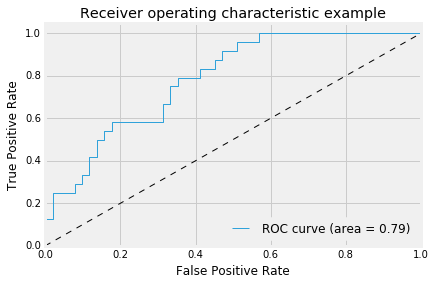

In [318]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

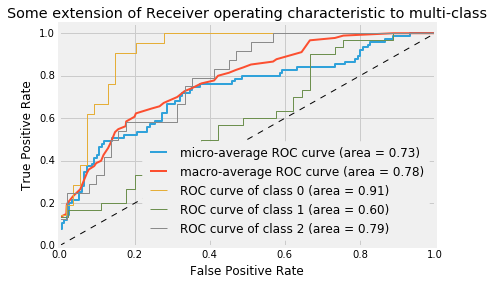

In [320]:
##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

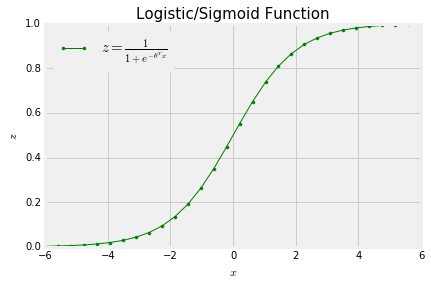

In [333]:
%run "../common.ipynb"
#graphFunction('x', 0,1, "r", "$x$", "$z$", "", '.') #, 'o', "sada")
graphFunction('1/(1+np.exp(-x))', -6,6, "g", "$x$", "$z$", "Logistic/Sigmoid Function",'.',"$z=\\frac{1}{1+e^{-\\theta^{T} x}}$") #, 'o', "sada")
#graphFunction(lambda x: log(x), 0,6, "b", "$x$", "$z$", "",'.',"$log(x)$") #, 'o', "sada")


In [335]:
[y for y in formula(x)]

[36.0,
 21.777777777777782,
 11.111111111111112,
 4.0,
 0.44444444444444486,
 0.44444444444444364,
 4.0,
 11.111111111111104,
 21.777777777777771,
 36.0]

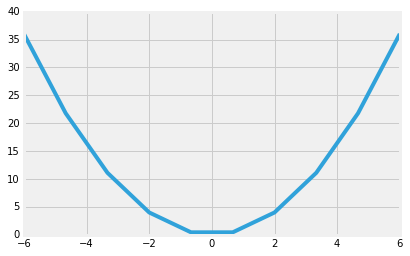

In [294]:
y=np.apply_along_axis(formula, 0, x)
plt.plot(x,y)


In [6]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])

display(df)
bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
display(df)


,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
...,...,...,...,...,...
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70
10,Scouts,2nd,Riani,2,62
11,Scouts,2nd,Ali,3,70


,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
...,...,...,...,...,...,...
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good
10,Scouts,2nd,Riani,2,62,Good
11,Scouts,2nd,Ali,3,70,Good


In [ ]:
graphFunction('1/(1+np.exp(-x))', -6,6, "g", "$x$", "$z$", "",'.',"$z=\\frac{1}{1+e^{-\\theta^{T} x}}$") #, 'o', "sada")


In [26]:
from sympy import *;
import numpy as np
x = 9
e= np.exp;
s='1/(1+ np.exp(-x))'
#sympy.latex(sympify(s) ) 

In [19]:
sympy.latex(sympify('1+2**(x+y)'))


'2^{x + y} + 1'

In [25]:
from collections import defaultdict

class GenerateSymbols(defaultdict):
    def __missing__(self, key):
        self[key] = sympy.Symbol(key)
        return self[key]

d= GenerateSymbols()    
eq = '(-b-sqrt(b**2-4*a*c))/(2*a)'

sympy.latex(sympy.simplify(eval(eq,d)))


'- \\frac{1}{2 a} \\left(b + \\sqrt{\\left (- 4 a c + b^{2} \\right )}\\right)'

In [49]:
eq='1/(1+ exp(-x))'
l=sympy.latex(sympy.simplify(eval(eq,d)))
l1=l.replace("\\","\\\\")
print ("{}\n{}".format("$"+l+"$","$"+l1+"$"))


$\frac{1}{\operatorname{exp}{\left (- x \right )} + 1}$
$\\frac{1}{\\operatorname{exp}{\\left (- x \\right )} + 1}$


In [36]:
eq =  '1/( (x+2)*(x+1) )'
sympy.latex(sympy.simplify(eval(eq,d)))


'\\frac{1}{\\left(x + 1\\right) \\left(x + 2\\right)}'

$- \frac{1}{2 a} \left(b + \sqrt{\left (- 4 a c + b^{2} \right )}\right)$

In [50]:
x = x +1
x


10